In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tmm(mode, n, d, angle, wl):
    p = np.cos(angle)
    q = np.sin(angle)

    e0 = 8.85418782E-12
    u0 = 1.25663706E-6

    N = len(wl)
    reflectance = np.zeros(N)
    transmittance = np.zeros(N)
    absorbance = np.zeros(N)

    for i in range(N):
        _lambda = wl[i]

        k0 = (2 * np.pi / _lambda) * (180 / np.pi)
        k_layers = [k0 * n_i * np.cos(np.radians(np.arcsin(q / n_i))) for n_i in n]
        phi_layers = [k * d_i for k, d_i in zip(k_layers, d)]

        if mode == 's':
            Y0 = (np.sqrt(e0 / u0)) * p
            Y_layers = [(np.sqrt(e0 / u0)) * n_i * np.cos(np.radians(np.arcsin(q / n_i))) for n_i in n]
            Y3 = (np.sqrt(e0 / u0)) * p
        elif mode == 'p':
            Y0 = (np.sqrt(e0 / u0)) / p
            Y_layers = [(np.sqrt(e0 / u0)) * n_i / np.cos(np.radians(np.arcsin(q / n_i))) for n_i in n]
            Y3 = (np.sqrt(e0 / u0)) / p

        # Initialize transfer matrix as identity matrix
        T = np.identity(2)

        # Construct the transfer matrix for the multilayer system
        for j in range(len(n)):
            M_layer = np.array([[np.cos(np.radians(phi_layers[j])), 1j * np.sin(np.radians(phi_layers[j])) / Y_layers[j]],
                                [1j * Y_layers[j] * np.sin(np.radians(phi_layers[j])), np.cos(np.radians(phi_layers[j]))]])
            T = np.dot(T, M_layer)

        # Calculate the reflection and transmission coefficients
        t = (2 * Y0) / ((Y0 * T[0, 0] + Y0 * Y3 * T[0, 1]) + T[1, 0] + Y3 * T[1, 1])
        r = ((Y0 * T[0, 0] + Y0 * Y3 * T[0, 1]) - T[1, 0] - Y3 * T[1, 1]) / (
                (Y0 * T[0, 0] + Y0 * Y3 * T[0, 1]) + T[1, 0] + Y3 * T[1, 1])

        reflectance[i] = np.abs(r) ** 2
        transmittance[i] = np.abs(t) ** 2
        absorbance[i] = 1 - reflectance[i] - transmittance[i]

    return {'R': reflectance, 'T': transmittance, 'Ab': absorbance}


Enter RI of first material (n1): 3
Enter RI of second material (n2): 1.5
Enter thickness of the first layer (d1 in nm): 100
Enter thickness of the second layer (d2 in nm): 150
Enter minimum wavelength (nm): 400
Enter maximum wavelength (nm): 1800
Enter the angle of incidence: 0
Enter the mode [1 for TE, and 0 for TM]: 1


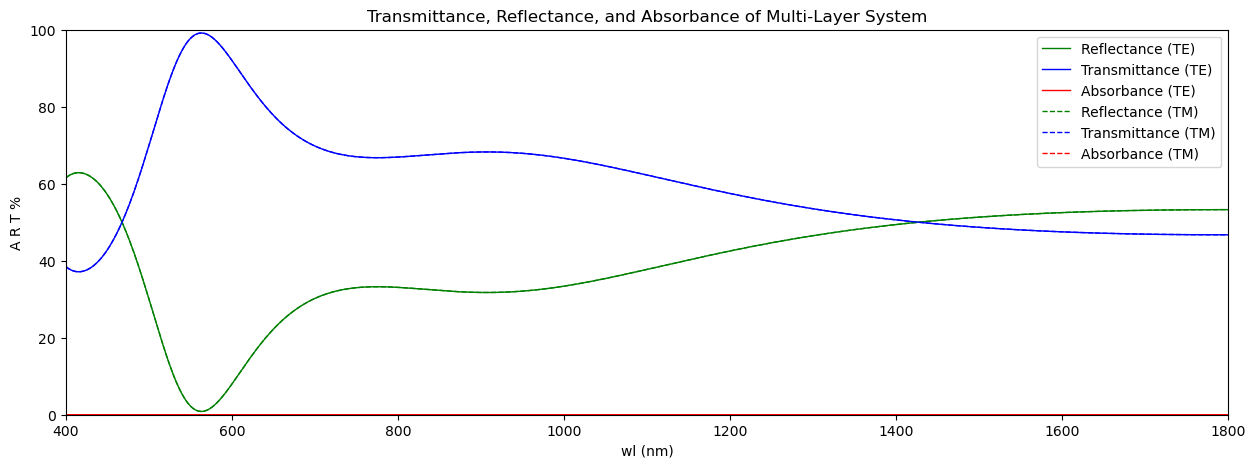

In [6]:
# Manual input of parameters
n1 = float(input("Enter RI of first material (n1): "))
n2 = float(input("Enter RI of second material (n2): "))
#n3 = float(input("Enter RI of second material (n3): "))
d1 = float(input("Enter thickness of the first layer (d1 in nm): "))
d2 = float(input("Enter thickness of the second layer (d2 in nm): "))
#d3 = float(input("Enter thickness of the second layer (d3 in nm): "))
lambda_min = float(input("Enter minimum wavelength (nm): "))
lambda_max = float(input("Enter maximum wavelength (nm): "))
angle = int(input("Enter the angle of incidence: "))
mode = int(input("Enter the mode [1 for TE, and 0 for TM]: ")) 

# Define the refractive indices and thicknesses as arrays
n = [n1, n2] #n3]
d = [d1, d2] #d3]

# Calculate wavelength range and initialize arrays
wl = np.linspace(lambda_min, lambda_max, int(lambda_max - lambda_min)+1 )

# Calculate results for 's' mode (TE)
result_dicts_s= tmm('s', n, d, (np.pi/180) * angle, wl)

# Calculate results for 'p' mode (TM)
result_dicts_p = tmm('p', n, d, (np.pi/180) * angle, wl)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(wl, result_dicts_s['R'] * 100, 'g-', linewidth=1, label='Reflectance (TE)')
plt.plot(wl, result_dicts_s['T'] * 100, 'b-', linewidth=1, label='Transmittance (TE)')
plt.plot(wl, result_dicts_s['Ab'] * 100, 'r-', linewidth=1, label='Absorbance (TE)')
plt.plot(wl, result_dicts_p['R'] * 100, 'g--', linewidth=1, label='Reflectance (TM)')
plt.plot(wl, result_dicts_p['T'] * 100, 'b--', linewidth=1, label='Transmittance (TM)')
plt.plot(wl, result_dicts_p['Ab'] * 100, 'r--', linewidth=1, label='Absorbance (TM)')
plt.xlabel('wl (nm)')
plt.ylabel('A R T %')
plt.xlim(lambda_min, lambda_max)
plt.ylim(0, 100)
plt.title('Transmittance, Reflectance, and Absorbance of Multi-Layer System')
plt.legend()
plt.show()


In [7]:
len(result_dicts_s)

3

In [8]:
len(result_dicts_s['R'])

1401

Enter RI of first material (n1): 3
Enter RI of second material (n2): 1.5
Enter RI of second material (n3): 3
Enter thickness of the first layer (d1 in nm): 100
Enter thickness of the second layer (d2 in nm): 150
Enter thickness of the second layer (d3 in nm): 100
Enter minimum wavelength (nm): 400
Enter maximum wavelength (nm): 1800
Enter the angle of incidence: 0
Enter the mode [1 for TE, and 0 for TM]: 0


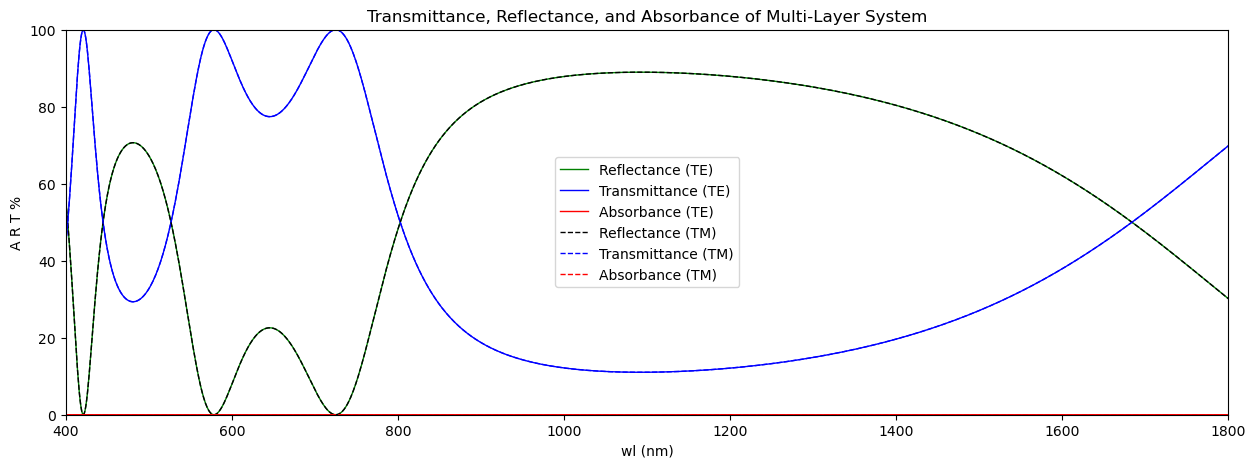

In [10]:
# Manual input of parameters
n1 = float(input("Enter RI of first material (n1): "))
n2 = float(input("Enter RI of second material (n2): "))
n3 = float(input("Enter RI of second material (n3): "))
d1 = float(input("Enter thickness of the first layer (d1 in nm): "))
d2 = float(input("Enter thickness of the second layer (d2 in nm): "))
d3 = float(input("Enter thickness of the second layer (d3 in nm): "))
lambda_min = float(input("Enter minimum wavelength (nm): "))
lambda_max = float(input("Enter maximum wavelength (nm): "))
angle = int(input("Enter the angle of incidence: "))
mode = int(input("Enter the mode [1 for TE, and 0 for TM]: ")) 

# Define the refractive indices and thicknesses as arrays
n = [n1, n2, n3]
d = [d1, d2, d3]

# Calculate wavelength range and initialize arrays
wl = np.linspace(lambda_min, lambda_max, int(lambda_max - lambda_min) + 1)

# Calculate results for 's' mode (TE)
result_dicts_s= tmm('s', n, d, (np.pi/180) * angle, wl)

# Calculate results for 'p' mode (TM)
result_dicts_p = tmm('p', n, d, (np.pi/180) * angle, wl)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(wl, result_dicts_s['Reflectance'] * 100, 'g-', linewidth=1, label='Reflectance (TE)')
plt.plot(wl, result_dicts_s['Transmittance'] * 100, 'b-', linewidth=1, label='Transmittance (TE)')
plt.plot(wl, result_dicts_s['Absorbance'] * 100, 'r-', linewidth=1, label='Absorbance (TE)')
plt.plot(wl, result_dicts_p['Reflectance'] * 100, 'k--', linewidth=1, label='Reflectance (TM)')
plt.plot(wl, result_dicts_p['Transmittance'] * 100, 'b--', linewidth=1, label='Transmittance (TM)')
plt.plot(wl, result_dicts_p['Absorbance'] * 100, 'r--', linewidth=1, label='Absorbance (TM)')
plt.xlabel('wl (nm)')
plt.ylabel('A R T %')
plt.xlim(lambda_min, lambda_max)
plt.ylim(0, 100)
plt.title('Transmittance, Reflectance, and Absorbance of Multi-Layer System')
plt.legend()
plt.show()

Enter the number of layers: 3
Enter RI of layer 1: 3.5
Enter thickness of layer 1 (in nm): 100
Enter RI of layer 2: 1.5
Enter thickness of layer 2 (in nm): 150
Enter RI of layer 3: 3
Enter thickness of layer 3 (in nm): 100
Enter minimum wavelength (nm): 400
Enter maximum wavelength (nm): 1800
Enter the angle of incidence: 0
Enter the mode [1 for TE, and 0 for TM]: 0


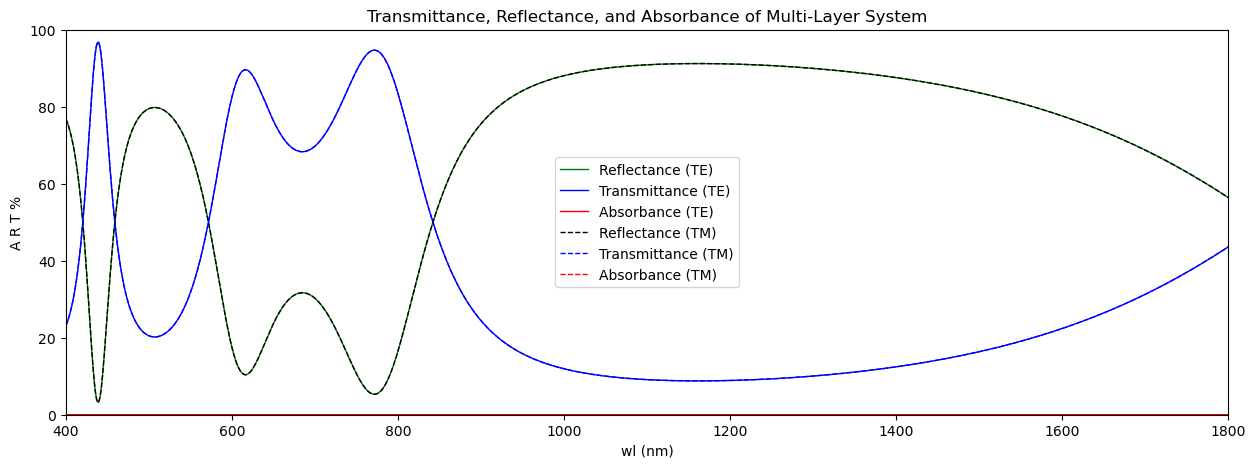

In [11]:
# Manual input of parameters
num_layers = int(input("Enter the number of layers: "))
n = []
d = []

for i in range(num_layers):
    n_i = float(input(f"Enter RI of layer n{i + 1}: "))
    d_i = float(input(f"Enter thickness of layer d{i + 1} (in nm): "))
    n.append(n_i)
    d.append(d_i)

lambda_min = float(input("Enter minimum wavelength (nm): "))
lambda_max = float(input("Enter maximum wavelength (nm): "))
angle = int(input("Enter the angle of incidence: "))
mode = int(input("Enter the mode [1 for TE, and 0 for TM]: "))

# Calculate wavelength range and initialize arrays
wl = np.linspace(lambda_min, lambda_max, int(lambda_max - lambda_min) + 1)

# Calculate results for 's' mode (TE)
result_dicts_s= tmm('s', n, d, (np.pi/180) * angle, wl)

# Calculate results for 'p' mode (TM)
result_dicts_p = tmm('p', n, d, (np.pi/180) * angle, wl)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(wl, result_dicts_s['Reflectance'] * 100, 'g-', linewidth=1, label='Reflectance (TE)')
plt.plot(wl, result_dicts_s['Transmittance'] * 100, 'b-', linewidth=1, label='Transmittance (TE)')
plt.plot(wl, result_dicts_s['Absorbance'] * 100, 'r-', linewidth=1, label='Absorbance (TE)')
plt.plot(wl, result_dicts_p['Reflectance'] * 100, 'k--', linewidth=1, label='Reflectance (TM)')
plt.plot(wl, result_dicts_p['Transmittance'] * 100, 'b--', linewidth=1, label='Transmittance (TM)')
plt.plot(wl, result_dicts_p['Absorbance'] * 100, 'r--', linewidth=1, label='Absorbance (TM)')
plt.xlabel('wl (nm)')
plt.ylabel('A R T %')
plt.xlim(lambda_min, lambda_max)
plt.ylim(0, 100)
plt.title('Transmittance, Reflectance, and Absorbance of Multi-Layer System')
plt.legend()
plt.show()